In [70]:
from sklearn.linear_model import LinearRegression as LR 
from sklearn.model_selection import train_test_split as tts
import pandas as pd
import seaborn as sns
import numpy as np
# Get input data 
df = pd.read_csv(r'D:\ERA_ML\IIT Roorkee\Dataset\kaggle_dataset\diamonds_linear_regression.csv',)
print(df.columns)
df.drop(labels =['Unnamed: 0','x','y','z'],  axis=1 ,inplace=True) # 


df.corr()


Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


,carat,depth,table,price
carat,1.000000,0.028224,0.181618,0.921591
depth,0.028224,1.000000,-0.295779,-0.010647
table,0.181618,-0.295779,1.000000,0.127134
price,0.921591,-0.010647,0.127134,1.000000


<AxesSubplot:xlabel='carat', ylabel='price'>

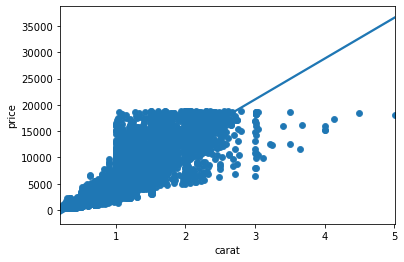

In [71]:
# Data visualization  Verify whether a linear relationship exists between dependent and independent

#sns.pairplot(df)

sns.scatterplot(x=df['carat'],y=df['price'])
sns.regplot(x=df['carat'],y=df['price'])


In [72]:
# Split 80 20 Training test 
X= df['carat']
y = df['price']

X_train, X_test, y_train, y_test=tts(X,y, test_size=0.2, train_size=0.8, random_state=40, shuffle=True, stratify=None)

# Build the model with training data
X = np.array(X_train).reshape(-1,1)
y = np.array(y_train).reshape(-1,1)
reg = LR().fit(X, y)

#Getting the coefficient of determination 
r_square = reg.score(X, y)
print('The coefficient of determination (r**2):',r_square)


#Unpacking the result
print('The slope is :', reg.coef_)
print('The intercept is :',reg.intercept_)




The coefficient of determination (r**2): 0.8496640986718639
The slope is : [[7756.21934843]]
The intercept is : [-2258.22116547]


In [73]:
# Predict the dependent variable
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
predicted_y = reg.predict(X_test)

print(predicted_y[:5])
print(y_test[:5])
# Get the metrics MSE , r , r_square

from sklearn.metrics import mean_squared_error as MSE

MSE(y_true=y_test, y_pred=predicted_y)



[[ 146.20683254]
 [ 921.82876738]
 [  68.64463905]
 [3171.13237842]
 [5963.37134386]]
[[1046]
 [ 923]
 [ 675]
 [2348]
 [4903]]


2456952.336822184

In [74]:
import sklearn
sklearn.metrics.r2_score(y_true=y_test, y_pred=predicted_y)

# After the prediction we find that r2 decreases by 0.001 

0.8480118368870907

In [75]:
sklearn.metrics.explained_variance_score(y_true=y_test, y_pred=predicted_y)

0.8480181796521953